**19/12/2021**
<br>
Bruno Mazzilli González

> # EDA: parte 2

El objetivo de este notebook es visualiar y analizar las variables del data set con el fin de entender mejor los datos

### Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt # plots
import seaborn as sns # plots
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 

In [2]:
%%time
data = pd.read_csv('data/c_sev_df.csv', low_memory=False)
del data['Unnamed: 0']

CPU times: user 4.93 s, sys: 2.05 s, total: 6.98 s
Wall time: 7.69 s


In [3]:
data.shape

(2328117, 21)

In [4]:
len(data.columns)

21

<br>

### Dias y Horas con mayor numero de accidenetes


In [5]:
num = [0, 1, 2, 3, 4, 5, 6]
w_days = data['C_WDAY']
w_days = w_days.sort_values()
w_days = w_days.replace({1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday", 7:"Sunday" })
h_days = data['C_HOUR']
h_days = h_days.sort_values()
weath_cond = data['C_WTHR']
weath_cond = weath_cond.replace({1:"Sunny", 2: "Overcast", 3:"Raining", 4:"Snowing", 5:"Freezing Rain", 6:"Visibility limitation (snow, fog, etc..)", 7: "Strong wind" })
road_cond = data['C_RSUR']
road_cond = road_cond.replace({1:"Dry,normal", 2:"Wet", 3:"Snow", 4:"Slush, wet snow", 5:"Icy", 6:"Sand/gravel/dirt", 7:"Muddy", 8:"Oil", 9:"Flooded"})
month_acc = data['C_MNTH']
month_acc = month_acc.sort_values()
month_acc = month_acc.replace({1:"JAN", 2:"FEB", 3:"MAR", 4:"APR", 5:"MAY", 6:"JUN", 7:"JUL", 8:"AUG", 9:"SEP", 10:"OCT", 11:"NOV", 12:"DEC"})

In [6]:
h_days

975034      0.0
950064      0.0
1688856     0.0
1222253     0.0
1222252     0.0
           ... 
1845125    23.0
846108     23.0
83352      23.0
403765     23.0
1694690    23.0
Name: C_HOUR, Length: 2328117, dtype: float64

<br>

### Horas del dia y numero de Accidentes

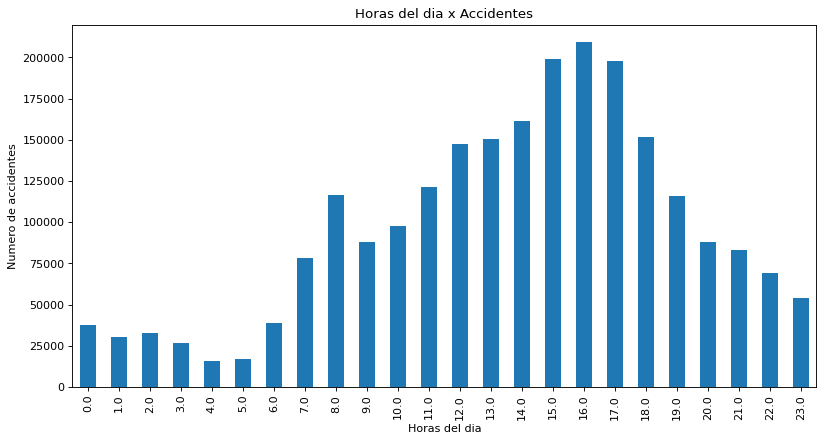

In [7]:
fig = plt.figure(figsize=(12, 6), dpi= 80)

ax = h_days.value_counts().sort_index().plot.bar()
ax.set_xlabel("Horas del dia")
ax.set_ylabel("Numero de accidentes")
plt.title("Horas del dia x Accidentes")
plt.show()


A primera vista, vemos que la mayoria de accidentes se concentran en las horas de 15h a 17h (despues de comer). 
No obstante no sacamos conclusiones todavía ya que podría ser que también haya mas desplazamientos de vehiculos a esas
horas por tanto incrementando la probabilidad de que haya un accidente.

<br>

### Dias de la semana con mas accidentes

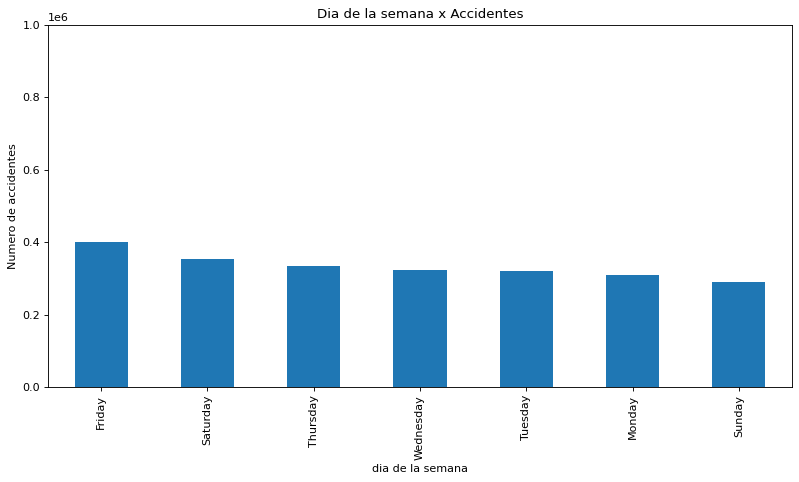

In [8]:
fig2 = plt.figure(figsize=(12, 6), dpi= 80)

ax2 = w_days.value_counts().plot.bar()
ax2.set_xlabel("dia de la semana")
ax2.set_ylabel("Numero de accidentes")
plt.title("Dia de la semana x Accidentes")
plt.ylim((0,1000000))
plt.show()

<br>

### Mes del año y numero de Accidentes

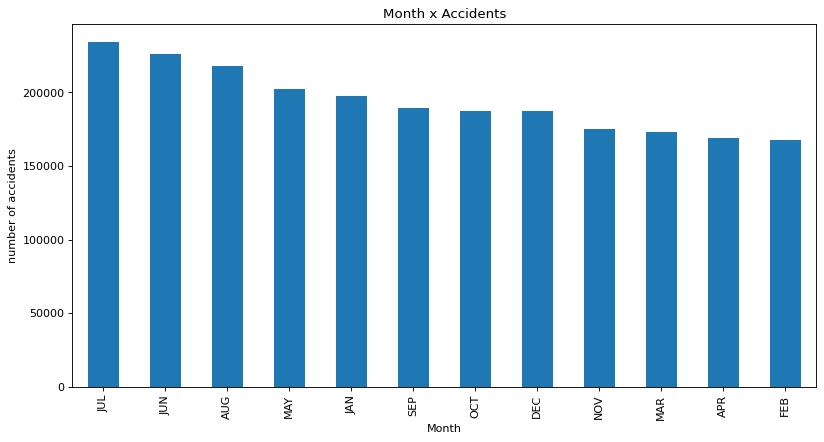

In [9]:
fig3 = plt.figure(figsize=(12, 6), dpi= 80)

ax3 = month_acc.value_counts().plot.bar()
ax3.set_xlabel("Month")
ax3.set_ylabel("number of accidents")
plt.title("Month x Accidents")
plt.show()

<br>

### Condiciones meteorologicas y numero de accidentes

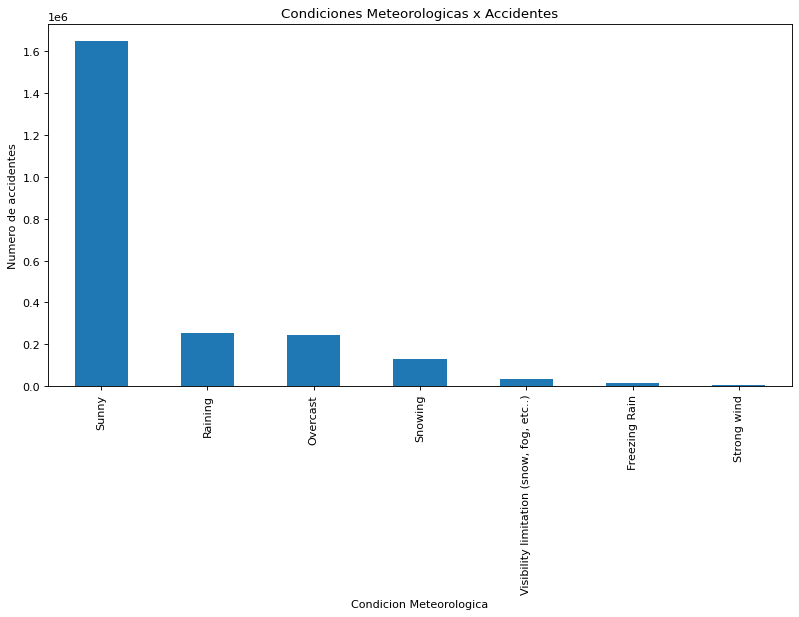

In [10]:
fig4 = plt.figure(figsize=(12, 6), dpi= 80)

ax4 = weath_cond.value_counts().plot.bar()
ax4.set_xlabel("Condicion Meteorologica")
ax4.set_ylabel("Numero de accidentes")
plt.title("Condiciones Meteorologicas x Accidentes")
plt.show()

In [11]:
data['C_WTHR'].value_counts()


1.0    1649850
3.0     252775
2.0     245277
4.0     130235
6.0      32023
5.0      12969
7.0       4988
Name: C_WTHR, dtype: int64

<br>

### Condiciones de carretera y Accidentes

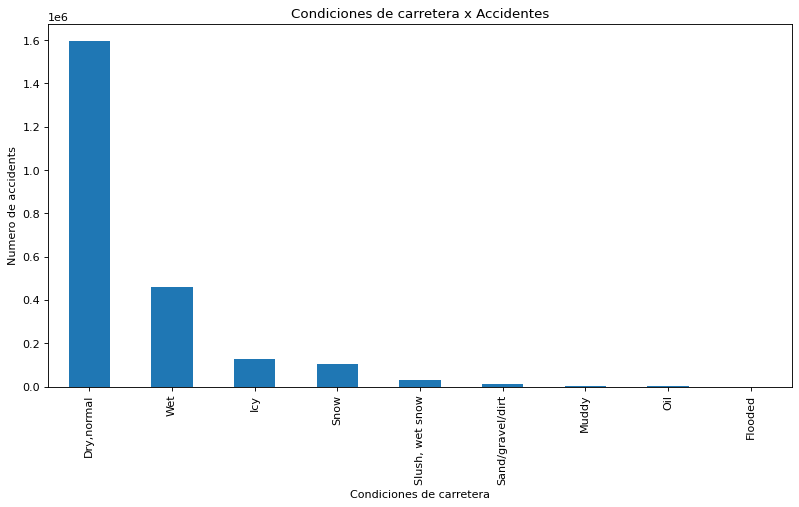

In [12]:
fig5 = plt.figure(figsize=(12, 6), dpi= 80)

ax5 = road_cond.value_counts().plot.bar()
ax5.set_xlabel("Condiciones de carretera")
ax5.set_ylabel("Numero de accidents")
plt.title("Condiciones de carretera x Accidentes")
plt.show()

<br>

### ¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son más/menos propensos a tener accidentes (acción correctiva en prima)?

<br>

### Tipo de vehiculo con mas accidentes

In [13]:
v_type = data['V_TYPE']
v_type = v_type.sort_values()
#v_type = v_type.replace({1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday", 7:"Sunday" })


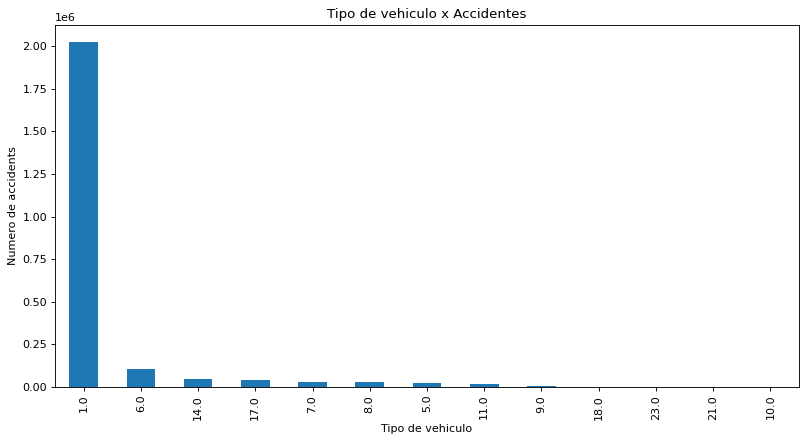

In [14]:
fig6 = plt.figure(figsize=(12, 6), dpi= 80)

ax6 = v_type.value_counts().plot.bar()
ax6.set_xlabel("Tipo de vehiculo")
ax6.set_ylabel("Numero de accidents")
plt.title("Tipo de vehiculo x Accidentes")
plt.show()

El tipo de vehiculo que mas accidentes tiene  es el vehículo ligero. Es probable que este tipo de vehiculo sea tambíen el mas comun en las carreteras.

<br>

### Año del vehiculo con mas accidentes

In [15]:
v_year = data['V_YEAR']
v_year = v_year.sort_values()

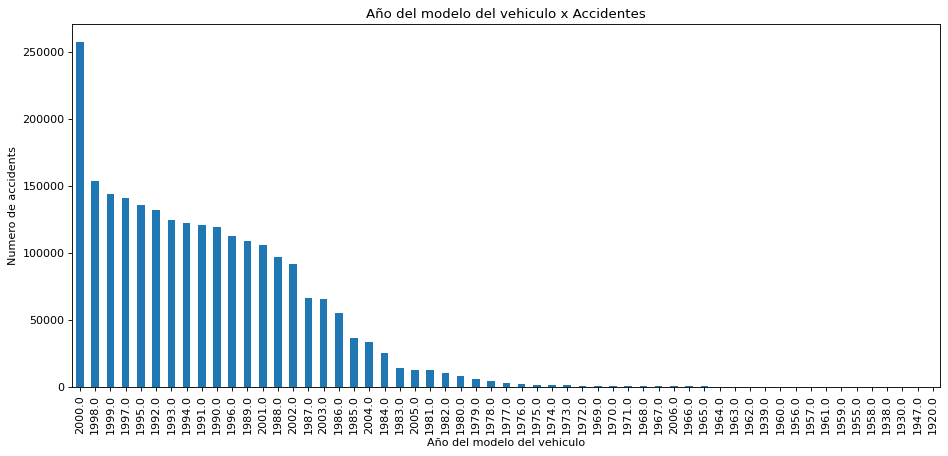

In [16]:
fig7 = plt.figure(figsize=(14, 6), dpi= 80)

v_year_counts = v_year.value_counts()
ax7 = v_year_counts[v_year_counts>20].plot.bar()
ax7.set_xlabel("Año del modelo del vehiculo")
ax7.set_ylabel("Numero de accidents")
plt.title("Año del modelo del vehiculo x Accidentes")
plt.show()

Los vehiculos del año 1998 son los que mas accidentes han tenido (por diferencia) en nuestro data set. Basado en la hipotesis de que no hay una cantidad significativa mayor de coches de un año en particular, esta gráfica nos proporciona un conocimiento interesante de nuestro dataset.

<br>

### Sexo del conductor con mas accidentes

In [17]:
p_sex = data['P_SEX']
p_sex = p_sex.sort_values()
p_sex = p_sex.replace({1:'Female',2:'Male'})
p_sex = p_sex.value_counts()

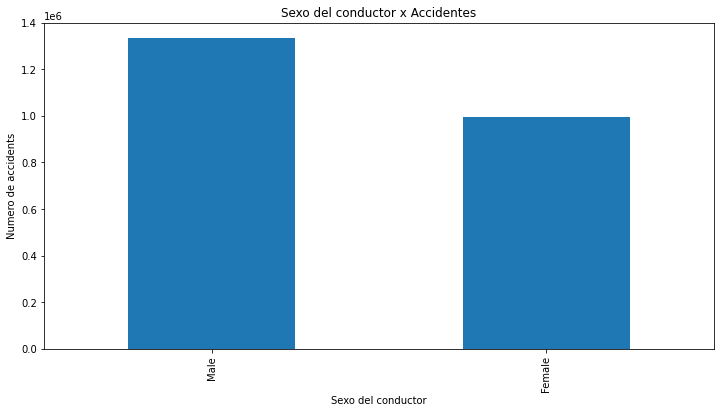

In [18]:
fig8 = plt.figure(figsize=(12, 6))

ax8 = p_sex.plot.bar()
ax8.set_xlabel("Sexo del conductor")
ax8.set_ylabel("Numero de accidents")
plt.title("Sexo del conductor x Accidentes")
plt.show()

<br>

### Edad del conductor y numero accidentes

In [19]:
p_age = data['P_AGE']
p_age = p_age.sort_values()
p_age = p_age.value_counts()

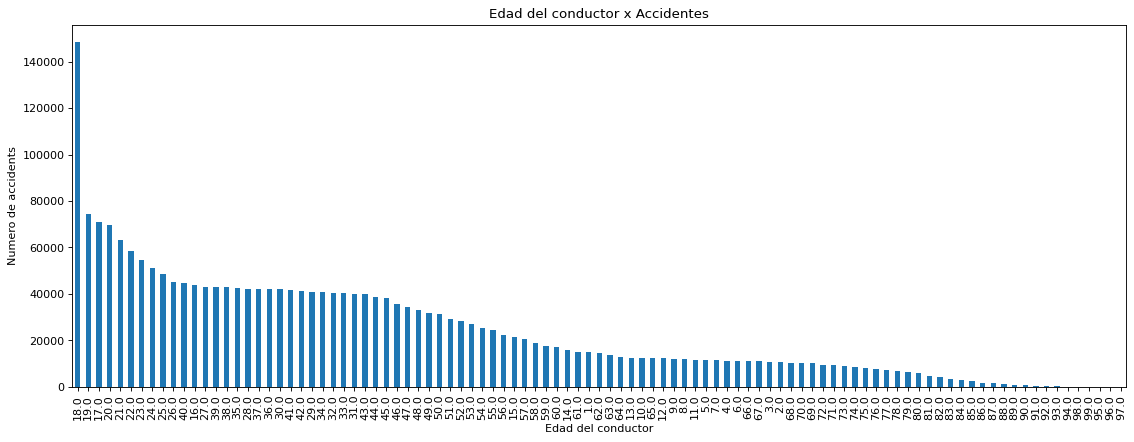

In [20]:
fig9 = plt.figure(figsize=(17, 6), dpi= 80)

ax9 = p_age.plot.bar()
ax9.set_xlabel("Edad del conductor")
ax9.set_ylabel("Numero de accidents")
plt.title("Edad del conductor x Accidentes")
plt.show()

<br>

### Correlaciones

In [21]:
def get_corr_matrix(dataset = None, metodo='pearson', size_figure=[10,8]):
    # Para obtener la correlación de Spearman, sólo cambiar el metodo por 'spearman'

    if dataset is None:
        print(u'\nHace falta pasar argumentos a la función')
        return 1
    sns.set(style="white")
    # Compute the correlation matrix
    corr = dataset.corr(method=metodo) 
    # Set self-correlation to zero to avoid distraction
    for i in range(corr.shape[0]):
        corr.iloc[i, i] = 0
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=size_figure)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, center=0,
                square=True, linewidths=.5,  cmap ='viridis' ) #cbar_kws={"shrink": .5}
    plt.show()
    
    return 0

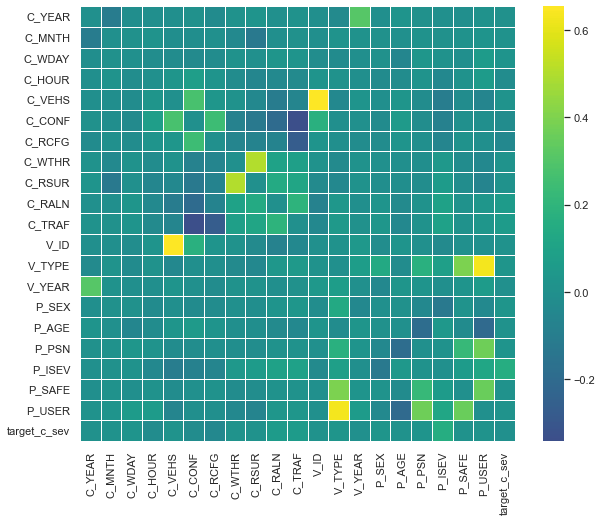

0

In [22]:
get_corr_matrix(data)